# Classification Challenge

Here, we will use a dataset from the UCI Machine Learning collection describing a Portugese bank marketing campaign.  Our goal is whether or not the individual purchased the promoted contract (the `y` column).  Your task is to do some exploratory eda, any feature engineering you feel relevant, and make sure to encode any categorical variables.  Next, your goal is to use `LogisticRegression` to produce the most appropriate classification model.  Consider whether or not this is a precision, recall, or accuracy oriented task and adjust your classifier to optimize the AUC_ROC score.

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/bank_marketing.csv', index_col=0)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [6]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
df.replace(['basic.9y', 'basic.4y', 'basic.6y'], 'basic', inplace=True)

In [12]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [14]:
import seaborn as sns

cellular     26144
telephone    15044
Name: contact, dtype: int64

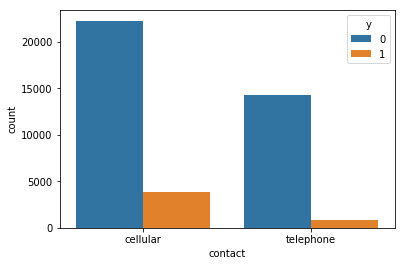

In [15]:
sns.countplot(df.contact, hue = df.y)
df.contact.value_counts()

In [16]:
df.groupby('job')['y'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: y, dtype: float64

In [16]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [17]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

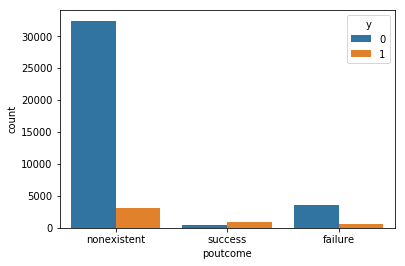

In [20]:
sns.countplot(df.poutcome, hue = df.y)

In [21]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [18]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [20]:
print('The proportion of class 0 is {:.2f}'.format(df.y.value_counts()[0]/(len(df.y))))

The proportion of class 0 is 0.89


In [24]:
X = df[['age', 'previous']]
y = df.y

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression(class_weight={0 : 0.89, 1: 0.11})

In [27]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight={0: 0.89, 1: 0.11}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [28]:
clf.score(X, y)

0.887394386714577

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8927843061085753

### Getting Better Data

In [30]:
from sklearn.linear_model import Lasso

In [31]:
las = Lasso()

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [43]:
pipe = make_pipeline(StandardScaler(), Lasso())
params = {'lasso__alpha': [0.1, 1, 10, 40, 60, 100, 500]}
grid = GridSearchCV(pipe, param_grid=params, cv = 5)
number_frame = pd.get_dummies(df.drop('y', axis = 1))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(number_frame, df.y)

In [45]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lasso__alpha': [0.1, 1, 10, 40, 60, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [56]:
names = [i for i in number_frame.columns][:-1]

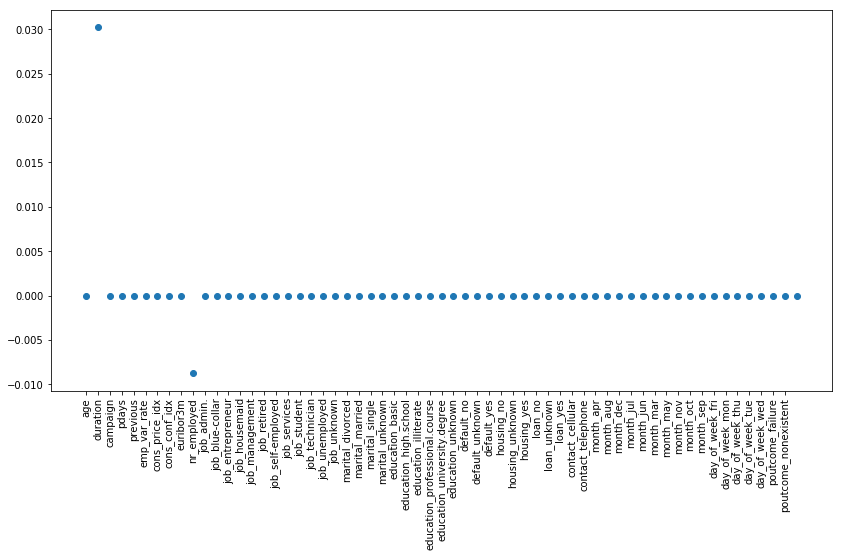

In [58]:
plt.figure(figsize = (14, 7))
plt.plot(grid.best_estimator_.named_steps.lasso.coef_, 'o')
plt.xticks(range(len(names)), names, rotation = 90);

In [59]:
df[['nr_employed', 'duration']].describe()

,nr_employed,duration
count,41188.000000,41188.000000
mean,5167.035911,258.285010
std,72.251528,259.279249
min,4963.600000,0.000000
25%,5099.100000,102.000000
50%,5191.000000,180.000000
75%,5228.100000,319.000000
max,5228.100000,4918.000000


In [88]:
X = df[['duration', 'nr_employed']]
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
params = {'logisticregression__C': [0.1, 1.0, 3.0, 10.0, 50, 100, 1000],
         'logisticregression__penalty': ['l1', 'l2']}
grid = GridSearchCV(pipe, param_grid=params)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.1, 1.0, 3.0, 10.0, 50, 100, 1000], 'logisticregression__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [90]:
from sklearn.metrics import classification_report, roc_curve

In [91]:
tpr, fpr, thresholds = roc_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:, 1])

In [92]:
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      9112
          1       0.67      0.34      0.45      1185

avg / total       0.89      0.90      0.89     10297



In [96]:
def fitter(X, y):
    '''
    This function takes in a set of inputs and output feature for
    use in a logistic regression model.  We will scan through a variety of values for 
    our regularization parameter and swap out both l1 and l2 penalties.  We return the classification
    report for the test set and the AUC score with ROC curve.'''
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    params = {'logisticregression__C': [0.1, 1.0, 3.0, 10.0, 50, 100, 1000], 'logisticregression__penalty': ['l1', 'l2']}
    grid = GridSearchCV(pipe, param_grid=params, scoring = 'roc_auc')
    grid.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:, 1])
    smallest = np.argmin(np.abs(thresholds))
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, c = 'black')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(classification_report(y_test, grid.best_estimator_.predict(X_test)), '\n The AUC score is {:.2f}'.format(grid.best_estimator_.score(X_test, y_test)))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95      9148
          1       0.68      0.41      0.51      1149

avg / total       0.90      0.91      0.90     10297
 
 The AUC score is 0.91


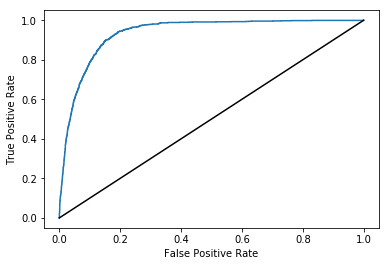

In [94]:
fitter(number_frame, df.y)

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      9142
          1       0.65      0.32      0.43      1155

avg / total       0.89      0.90      0.89     10297
 
 The AUC score is 0.90


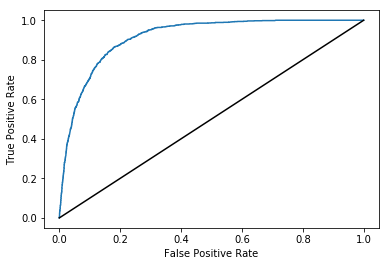

In [95]:
fitter(df[['duration', 'nr_employed']], df.y)